#INSTALL THE KERAS-VGGFACE LIBRARY

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Install keras-vggface library from github

In [2]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-tp_e1624
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-tp_e1624
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8325 sha256=556737f3ffa1694807199c9b23a2a1cdf29207a3671bfe9eebecc51a26776509
  Stored in directory: /tmp/pip-ephem-wheel-cache-qfz1_wiy/wheels/08/df/86/0225d44647ab2256dbf1e006823288fe9cc86367a056e6ea2c
Successfully built keras-vggface


In [3]:
#querying the installed package to see details of the package
!pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, keras, numpy, pyyaml, pillow, h5py, six
Required-by: 


In [4]:
!pip install Keras-Applications

     |████████████████████████████████| 50 kB 3.8 MB/s 


In [5]:
#replace the "keras.engine.topology" module into "tensorflow.keras.utils" module
filename = "/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))
import tensorflow as tf

from keras_vggface.vggface import VGGFace

vggface = VGGFace(model='resnet50') # or VGGFace() as default

165453824/165439116 [==============================] - 6s 0us/step


In [6]:
#check version of keras_vggface
import keras_vggface
#print version
print(keras_vggface.__version__)

0.6


#DETECT FACE FOR FACE REGCONITION

Using the Multi-Task Cascaded Convolutional Neural Network, or MTCNN for face detection


reference for MTCNN:

https://www.miai.vn/2019/09/11/face-recog-2-0-nhan-dien-khuon-mat-trong-video-bang-mtcnn-va-facenet/

https://viblo.asia/p/nhan-dien-khuon-mat-voi-mang-mtcnn-va-facenet-phan-1-Qbq5QDN4lD8


https://viblo.asia/p/nhan-dien-khuon-mat-voi-mang-mtcnn-va-facenet-phan-2-bJzKmrVXZ9N

In [7]:
#Using the implementation provide by Iván de Paz Centeno in the ipazc/mtcnn project
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 7.2 MB/s 


In [8]:
#Confirm mtcnn was installed correctly
import mtcnn
#Print version
print(mtcnn.__version__)

0.1.0


reference for bounding box:
https://www.indusmic.com/post/bounding-boxes

In [9]:
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

In [10]:
#Extract a single face from a given photograph
def extract_face(filename, required_size=(224,224)):
  #The first step is to load an image as a NumPy array, which we can achieve using the Matplotlib imread() function
  #Load image from file (***variable pixels is a matrix with height x width x depth***)
  pixels = pyplot.imread(filename)
  #Create an MTCNN face detector, using default weights
  detector = MTCNN()
  #Detect faces in the image
  results = detector.detect_faces(pixels)
  #The result is the list of bounding boxes, where each bounding box defines a lower-left-corner of the bounding
  #box, as well as the width and the height.

  #Assume there is only one face in the photo for our experiments, we can determine the pixel coordinates of
  #the bounding box as follows.
  #Extract the bounding box from the first face
  x1, y1, width, height =  results[0]['box']
  x2, y2 = x1 + width, y1 + height

  #We can use these coordinates to extract the face
  #Extract the face
  face = pixels[y1:y2, x1:x2]

  #Using the PIL library to resize this small image of the the face to the required size
  #Specifically, the model expects square input face with the shape 224x224
  #Resize pixels to the model size
  image = Image.fromarray(face) #this function will convert a matrix into a photograph
  image = image.resize((224,224))
  face_array = asarray(image) #this function will convert a photograph into a matrix
  return face_array

Now, we will test extract_face function with a photograph

In [11]:
path = '/content/drive/MyDrive/Colab Notebooks/Pattern Classification/Final Project/'

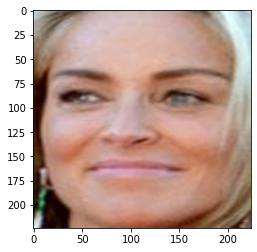

In [12]:
#load the photo and extract the face
pixels = extract_face(path + 'sharon_stone1.jpg')
#plot the extracted face
pyplot.imshow(pixels)
#show the plot
pyplot.show()

#Drawing bounding box and ground truth:
https://www.kaggle.com/code/kevinpatel04/convert-json-annotation-to-csv

In [13]:
test = '/content/drive/MyDrive/Colab Notebooks/Pattern Classification/Final Project/images.npy'

In [14]:
import numpy as np
data = np.load(test, allow_pickle=True)

In [15]:
#number of images in dataset
len(data)

409

In [16]:
type(data[0][1])

list

In [17]:
import ast
#get index of images with depth is equal to 3 and there is only one face
def get_index_of_images_from_data(data):
  arr = np.array([])
  for i in range(len(data)):
    #print(i)
    if i != 272:
      if (data[i][0].shape[2] == 3):
        temp = data[i][1]
        temp = str(temp)
        temp = temp.lstrip('[')
        temp = temp.rstrip(']')
        temp = ast.literal_eval(temp)
        if(type(temp) == dict):
          arr = np.append(arr, i)
  return arr.astype(int)  

In [18]:
index_of_images = get_index_of_images_from_data(data)

In [19]:
#total of images which have depth is equal to 3
len(index_of_images)

140

In [ ]:
data[2][0].shape[2]

3

In [ ]:
test = data[8][1]

In [ ]:
test

[{'imageHeight': 1026,
  'imageWidth': 625,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.136, 'y': 0.32456140350877194},
   {'x': 0.4704, 'y': 0.5555555555555556}]},
 {'imageHeight': 1026,
  'imageWidth': 625,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5552, 'y': 0.7066276803118908},
   {'x': 0.8608, 'y': 0.8489278752436648}]}]

In [ ]:
test = str(test)
test = test.lstrip('[')
test = test.rstrip(']')

In [ ]:
test

"{'label': ['Face'], 'notes': '', 'points': [{'x': 0.1719641401792991, 'y': 0.01884057971014493}, {'x': 0.5990220048899756, 'y': 0.8492753623188406}], 'imageWidth': 1280, 'imageHeight': 720}"

In [ ]:
import ast
test = ast.literal_eval(test)

In [ ]:
type(test)

dict

In [ ]:
print(test[0]['imageHeight'])
print(test[0]['imageWidth'])

333
650


In [ ]:
x1 = round(test[0]['points'][0]['x']*test[0]['imageWidth'])
y1 = round(test[0]['points'][0]['y']*test[0]['imageHeight'])
x2 = round(test[0]['points'][1]['x']*test[1]['imageWidth'])
y2 = round(test[0]['points'][1]['y']*test[1]['imageHeight'])

In [ ]:
print(x1,x2,y1,y2)

56 112 102 151


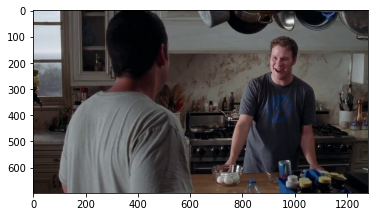

In [ ]:
pyplot.imshow(data[1][0])

In [20]:
from matplotlib import pyplot
from cv2 import rectangle
import matplotlib.pyplot as plt
import ast

#showing bounding box and ground truth in photograph
def show_bounding_box_and_ground_truth(image, gt):
  #The first step is to load an image as a NumPy array, which we can achieve using the Matplotlib imread() function
  #Load image from file (***variable pixels is a matrix with height x width x depth***)
  pixels = asarray(image)
  plt.imshow(pixels)
  ax = plt.gca()
  #Create an MTCNN face detector, using default weights
  detector = MTCNN()
  #Detect faces in the image
  results = detector.detect_faces(pixels)
  #The result is the list of bounding boxes, where each bounding box defines a lower-left-corner of the bounding
  #box, as well as the width and the height.

  #Assume there is only one face in the photo for our experiments, we can determine the pixel coordinates of
  #the bounding box as follows.
  #Extract the bounding box from the faces
  for face in results:
    x1, y1, width, height =  face['box']

    #display coordinates of x1, y1, x2 and y2
    #print(x1,y1,width+x1,height+y1)
    
    face_border = plt.Rectangle((x1, y1), width, height,
                                fill=False, color='red')
	  #draw a rectangle over the pixels
    #face_border = rectangle(pixels, (x1,y1),(x2,y2), (0, 250, 253),2)
    ax.add_patch(face_border)

  ground_truth = str(gt)
  ground_truth = ground_truth.lstrip('[')
  ground_truth = ground_truth.rstrip(']')
  ground_truth = ast.literal_eval(ground_truth)
  if type(ground_truth) == tuple:
    #print(len(ground_truth))
    for i in ground_truth:
      x1 = round(i['points'][0]['x']*224)
      y1 = round(i['points'][0]['y']*224)
      x2 = round(i['points'][1]['x']*224)
      y2 = round(i['points'][1]['y']*224)
      #display coordinates of x1, y1, x2 and y2
      #print(x1,y1,x2,y2)
      gt_border = plt.Rectangle((x1, y1), x2-x1, y2-y1,
                                fill=False, color='blue')
      ax.add_patch(gt_border)
  else:
    x1 = round(ground_truth['points'][0]['x']*224)
    y1 = round(ground_truth['points'][0]['y']*224)
    x2 = round(ground_truth['points'][1]['x']*224)
    y2 = round(ground_truth['points'][1]['y']*224)
    gt_border = plt.Rectangle((x1, y1), x2-x1, y2-y1,
                              fill=False, color='blue')
    ax.add_patch(gt_border)
  plt.show()

In [ ]:
data[0][0].shape

(333, 650, 3)

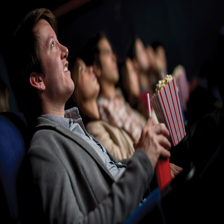

In [ ]:
image = Image.fromarray(data[65][0])
image = image.resize((224,224))
image

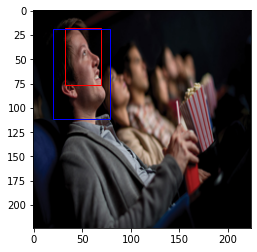

In [ ]:
show_bounding_box_and_ground_truth(image, data[65][1])

#Evaluate MTCNN model:
https://www.datanics.tech/2020/11/understanding-mean-average-precision.html

Calculating IoU(Intersection over union)

In [21]:
import pandas as pd
import numpy as np
import cv2

In [22]:
def calculate_IoU(x1_bb, y1_bb, x2_bb, y2_bb, x1_gt, y1_gt, x2_gt, y2_gt):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(x1_bb, x1_gt)
	yA = max(y1_bb, y1_gt)
	xB = min(x2_bb, x2_gt)
	yB = min(y2_bb, y2_gt)
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# compute the area of both the prediction and ground-truth
	# rectangles
	pred_area = (x2_bb - x1_bb + 1) * (y2_bb - y1_bb + 1)
	actual_area = (x2_gt - x1_gt + 1) * (y2_gt - y1_gt + 1)
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(pred_area + actual_area - interArea)
	# return the intersection over union value
	return iou

Evaluation table

In [23]:
#creating an evaluation table
def create_evaluation_table(data, index_of_images):
  FN = 0
  evaluation_table = pd.DataFrame()
  evaluation_table['index_of_images'] = 0
  evaluation_table['IoU'] = 0
  for i in index_of_images:
    gt = data[i][1]
    #get ground truth
    ground_truth = str(gt)
    ground_truth = ground_truth.lstrip('[')
    ground_truth = ground_truth.rstrip(']')
    ground_truth = ast.literal_eval(ground_truth)
    #get image
    image = Image.fromarray(data[i][0])
    image = image.resize((224,224))
    pixels = asarray(image)
    #Create an MTCNN face detector, using default weights
    detector = MTCNN()
    #Detect faces in the image
    results = detector.detect_faces(pixels)
    if type(ground_truth) == tuple:
      n = 0
      if len(ground_truth) > len(results):
        n = len(results)
        FN = FN + (len(ground_truth) - len(results))
      else:
        n = len(ground_truth)
      for j in range(n):
        #Max, Min coordinates of ground truth
        x1_gt = round(ground_truth[j]['points'][0]['x']*224)
        y1_gt = round(ground_truth[j]['points'][0]['y']*224)
        x2_gt = round(ground_truth[j]['points'][1]['x']*224)
        y2_gt = round(ground_truth[j]['points'][1]['y']*224)

        #Max, min coordinates of bounding box
        x1, y1, width, height =  results[j]['box']

        x1_bb = x1
        y1_bb = y1
        x2_bb = width + x1
        y2_bb = height + y1

        #calculate IoU
        iou = calculate_IoU(x1_bb, y1_bb, x2_bb, y2_bb, x1_gt, y1_gt, x2_gt, y2_gt)
        #add index of image and IoU into dataframe
        temp = {'index_of_images': i, 'IoU': iou}
        evaluation_table = evaluation_table.append(temp, ignore_index=True)

    else:
      if (len(ground_truth) > 0) and (len(results) == 0):
        FN = FN + 1
      #Max, Min coordinates of ground truth
      x1_gt = round(ground_truth['points'][0]['x']*224)
      y1_gt = round(ground_truth['points'][0]['y']*224)
      x2_gt = round(ground_truth['points'][1]['x']*224)
      y2_gt = round(ground_truth['points'][1]['y']*224)

      #Max, min coordinates of bounding box
      for face in results:
        x1, y1, width, height =  face['box']

        x1_bb = x1
        y1_bb = y1
        x2_bb = width + x1
        y2_bb = height + y1

      #calculate IoU
      iou = calculate_IoU(x1_bb, y1_bb, x2_bb, y2_bb, x1_gt, y1_gt, x2_gt, y2_gt)
      #add index of image and IoU into dataframe
      temp = {'index_of_images': i, 'IoU': iou}
      evaluation_table = evaluation_table.append(temp, ignore_index=True)
    
  return evaluation_table, FN

In [24]:
#creating an evaluation table
def create_evaluation_table(data, index_of_images):
  FN = 0
  evaluation_table = pd.DataFrame()
  evaluation_table['index_of_images'] = 0
  evaluation_table['IoU'] = 0
  for i in index_of_images:
    gt = data[i][1]
    #get ground truth
    ground_truth = str(gt)
    ground_truth = ground_truth.lstrip('[')
    ground_truth = ground_truth.rstrip(']')
    ground_truth = ast.literal_eval(ground_truth)
    #get image
    image = Image.fromarray(data[i][0])
    image = image.resize((224,224))
    pixels = asarray(image)
    #Create an MTCNN face detector, using default weights
    detector = MTCNN()
    #Detect faces in the image
    results = detector.detect_faces(pixels)
    if type(ground_truth) == dict and len(results) <= 1:
      if (len(ground_truth) > 0) and (len(results) == 0):
        FN = FN + 1
      else:
        #Max, Min coordinates of ground truth
        x1_gt = round(ground_truth['points'][0]['x']*224)
        y1_gt = round(ground_truth['points'][0]['y']*224)
        x2_gt = round(ground_truth['points'][1]['x']*224)
        y2_gt = round(ground_truth['points'][1]['y']*224)

        #Max, min coordinates of bounding box
        for face in results:
          x1, y1, width, height =  face['box']

          x1_bb = x1
          y1_bb = y1
          x2_bb = width + x1
          y2_bb = height + y1

        #calculate IoU
        iou = calculate_IoU(x1_bb, y1_bb, x2_bb, y2_bb, x1_gt, y1_gt, x2_gt, y2_gt)
        #add index of image and IoU into dataframe
        temp = {'index_of_images': i, 'IoU': iou}
        evaluation_table = evaluation_table.append(temp, ignore_index=True)
    
  return evaluation_table, FN

In [25]:
index_of_images

array([  7,  10,  17,  19,  20,  21,  25,  26,  28,  31,  37,  39,  50,
        55,  58,  65,  66,  68,  73,  75,  77,  79,  82,  84,  88,  89,
        90,  91,  92,  94,  95,  96,  98, 102, 105, 108, 109, 113, 114,
       115, 118, 120, 121, 123, 124, 129, 130, 132, 134, 136, 143, 144,
       145, 147, 149, 150, 157, 160, 165, 168, 171, 178, 181, 201, 202,
       205, 206, 207, 218, 221, 225, 237, 239, 241, 243, 249, 250, 258,
       259, 260, 264, 265, 268, 275, 277, 278, 279, 280, 281, 286, 296,
       300, 301, 306, 308, 313, 316, 320, 321, 327, 332, 335, 338, 339,
       340, 341, 344, 345, 346, 348, 351, 352, 353, 354, 360, 362, 366,
       367, 368, 369, 370, 371, 373, 376, 378, 379, 381, 383, 384, 385,
       387, 391, 392, 398, 399, 401, 403, 404, 405, 406])

In [26]:
eval_table, FN = create_evaluation_table(data, index_of_images)

In [27]:
FN

21

In [28]:
eval_table

,index_of_images,IoU
0,10.0,0.620301
1,17.0,0.696970
2,20.0,0.592593
3,21.0,0.540861
4,25.0,0.434659
...,...,...
95,401.0,0.632653
96,403.0,0.442541
97,404.0,0.733202
98,405.0,0.463458


In [29]:
# creating column 'TP/FP' which will store TP for True positive and FP for False positive
# if IOU is greater than 0.5 then TP else FP
eval_table['TP/FP'] = eval_table['IoU'].apply(lambda x: 'TP' if x>=0.4 else 'FP')

In [30]:
eval_table

,index_of_images,IoU,TP/FP
0,10.0,0.620301,TP
1,17.0,0.696970,TP
2,20.0,0.592593,TP
3,21.0,0.540861,TP
4,25.0,0.434659,TP
...,...,...,...
95,401.0,0.632653,TP
96,403.0,0.442541,TP
97,404.0,0.733202,TP
98,405.0,0.463458,TP


In [31]:
# calculating Precision and recall

Precision = []
Recall = []

# initializing
TP = FP = 0

for index , row in eval_table.iterrows():     
    
    if row.IoU >= 0.4:
        TP =TP+1
    else:
        FP =FP+1     

    try:
        
        AP = TP/(TP+FP)
        Rec = TP/(TP+FN)
        
    except ZeroDivisionError:
        
        AP = Recall = 0.0
    
    Precision.append(AP)
    Recall.append(Rec)


eval_table['Precision'] = Precision
eval_table['Recall'] = Recall

In [32]:
eval_table

,index_of_images,IoU,TP/FP,Precision,Recall
0,10.0,0.620301,TP,1.000000,0.045455
1,17.0,0.696970,TP,1.000000,0.086957
2,20.0,0.592593,TP,1.000000,0.125000
3,21.0,0.540861,TP,1.000000,0.160000
4,25.0,0.434659,TP,1.000000,0.192308
...,...,...,...,...,...
95,401.0,0.632653,TP,0.781250,0.781250
96,403.0,0.442541,TP,0.783505,0.783505
97,404.0,0.733202,TP,0.785714,0.785714
98,405.0,0.463458,TP,0.787879,0.787879


Now we have Precision, Recall and IoU calculated, there is one thing left to be calculated and then we are good to go for calculating mAP and that thing is IP(Interpolated Precision).

Interpolated Precision: It is simply the highest precision value for a certain recall level. For example if we have same recall value 0.2 for three different precision values 0.87, 0.76 and 0.68 then interpolated precision for all three recall values will be the highest among these three values that is 0.87.

In [33]:
#calculating Interpolated Precision
eval_table['IP'] = eval_table.groupby('Recall')['Precision'].transform('max')

In [34]:
eval_table

,index_of_images,IoU,TP/FP,Precision,Recall,IP
0,10.0,0.620301,TP,1.000000,0.045455,1.000000
1,17.0,0.696970,TP,1.000000,0.086957,1.000000
2,20.0,0.592593,TP,1.000000,0.125000,1.000000
3,21.0,0.540861,TP,1.000000,0.160000,1.000000
4,25.0,0.434659,TP,1.000000,0.192308,1.000000
...,...,...,...,...,...,...
95,401.0,0.632653,TP,0.781250,0.781250,0.781250
96,403.0,0.442541,TP,0.783505,0.783505,0.783505
97,404.0,0.733202,TP,0.785714,0.785714,0.785714
98,405.0,0.463458,TP,0.787879,0.787879,0.787879


In [35]:
prec_at_rec = []

for recall_level in np.linspace(0.0, 1.0, 11):
    try:
        x = eval_table[eval_table['Recall'] >= recall_level]['Precision']
        prec = max(x)
    except:
        prec = 0.0
    prec_at_rec.append(prec)
avg_prec = np.mean(prec_at_rec)
print('11 point precision is ', prec_at_rec)
print('mAP is ', avg_prec)

11 point precision is  [1.0, 1.0, 1.0, 1.0, 0.9230769230769231, 0.9230769230769231, 0.8974358974358975, 0.8225806451612904, 0.0, 0.0, 0.0]
mAP is  0.6878336717046395


#Face Identification With VGGFace2

Using the VGGFace2 model to perform face regconition with photographs
of celebrities from Wikipedia

A VGGFace model can be created using the VGGFace() constructor and specifying the type of model to create via the ‘model‘ argument.

The keras-vggface library provides three pre-trained VGGModels, a VGGFace1 model via model=’vgg16′ (the default), and two VGGFace2 models ‘resnet50‘ and ‘senet50‘.

In [ ]:
#The example below creates a 'resnet50' VGGFace2 model and summarizes the shape of the inputs and ouputs
#Example of creating a face embedding
from keras_vggface.vggface import VGGFace
#Create a vggface2 model
model = VGGFace(model='resnet50')
#Summerize input and output shape
print('Input: %s' % model.inputs)
print('Output: %s' % model.outputs)

Input: [<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>]
Output: [<KerasTensor: shape=(None, 8631) dtype=float32 (created by layer 'classifier')>]


We can see that the model expects input color images of faces with the shape of 244×244 and the output will be a class prediction of 8,631 people. This makes sense given that the pre-trained models were trained on 8,631 identities in the MS-Celeb-1M dataset

In [ ]:
#Example of face detection with a vggface2 model
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

In [ ]:
#Extract a single face from a given photograph
def extract_face(filename, required_size = (224,224)):
  #load image from file
  pixels = pyplot.imread(filename)
  #Create the detector, using default weights
  detector = MTCNN()
  #Detect faces in the image
  results = detector.detect_faces(pixels)
  #Extract the bounding box from the first face
  x1, y1, width, height = results[0]['box']
  x2, y2 = x1 + width, y1 + height
  #Extract the face
  face = pixels[y1:y2, x1:x2]
  #Resize pixels to the model size
  image = Image.fromarray(face)
  image = image.resize(required_size)
  face_array = asarray(image)
  return face_array

In [ ]:
test = MTCNN()

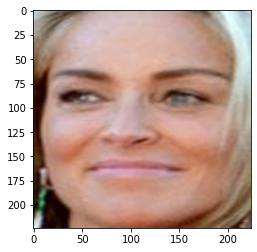

1359872/1346516 [==============================] - 0s 0us/step
b' Sharon_Stone': 99.574%
b' Noelle_Reno': 0.080%
b' Anita_Lipnicka': 0.027%
b' Elisabeth_R\xc3\xb6hm': 0.027%
b' Emma_Atkins': 0.019%


In [ ]:
#Load the photo and extract the face
path = '/content/drive/MyDrive/Colab Notebooks/Pattern Classification/Final Project/'
pixels = extract_face(path + 'sharon_stone1.jpg')
#plot the extracted face
pyplot.imshow(pixels)
#show the plot
pyplot.show()
#Convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis = 0)
#Prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version = 2)
#Create a vggface model
model = VGGFace(model='resnet50')
#Perform prediction
yhat = model.predict(samples)
#Convert prediction into names
results = decode_predictions(yhat) # comparing the vector yhat with the vectors that VGGFace2 model used to learn
#Display most likely results
for result in results[0]:
  print('%s: %.3f%%' % (result[0], result[1]*100)) 

The top five highest probability names are then displayed.

We can see that the model correctly identifies the face as belonging to Sharon Stone with a likelihood of 99.574%.

You might like to try this example with other photographs of celebrities taken from Wikipedia. Try a diverse set of genders, races, and ages. You will discover that the model is not perfect, but for those celebrities that it does know well, it can be effective.

You might like to try other versions of the model, such as ‘vgg16‘ and ‘senet50‘, then compare results. For example, I found that with a photograph of Oscar Isaac, that the ‘vgg16‘ is effective, but the VGGFace2 models are not.

#Get 8631 dimensional vector of faces in dataset

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Pattern Classification/Final Project/'

ben_afflek

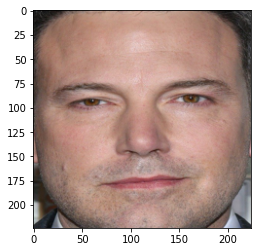

In [ ]:
#Load the photo and extract the face
pixels = extract_face(path + 'ben_afflek.jpg')
#plot the extracted face
pyplot.imshow(pixels)
#show the plot
pyplot.show()
#Convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis = 0)
#Prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version = 2)
#Create a vggface model
model = VGGFace(model='resnet50')
#Perform prediction
yhat_for_ben_afflek = model.predict(samples)

In [ ]:
yhat_for_ben_afflek

array([[1.4196278e-05, 7.9502288e-04, 1.1590019e-04, ..., 1.2690594e-05,
        1.5017426e-05, 7.8202982e-04]], dtype=float32)

elton_john

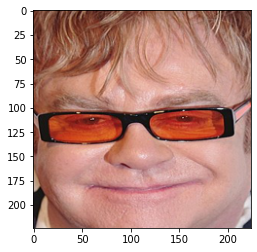

In [ ]:
#Load the photo and extract the face
pixels = extract_face(path + 'elton_john.jpg')
#plot the extracted face
pyplot.imshow(pixels)
#show the plot
pyplot.show()
#Convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis = 0)
#Prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version = 2)
#Create a vggface model
model = VGGFace(model='resnet50')
#Perform prediction
yhat_for_elton_john = model.predict(samples)

In [ ]:
yhat_for_elton_john

array([[4.9785034e-05, 6.1604578e-06, 6.8389468e-06, ..., 1.7857012e-05,
        1.4775435e-05, 2.6308919e-06]], dtype=float32)

jerry_seinfeld

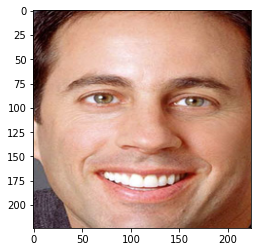

In [ ]:
#Load the photo and extract the face
pixels = extract_face(path + 'jerry_seinfeld.jpg')
#plot the extracted face
pyplot.imshow(pixels)
#show the plot
pyplot.show()
#Convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis = 0)
#Prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version = 2)
#Create a vggface model
model = VGGFace(model='resnet50')
#Perform prediction
yhat_for_jerry_seinfeld = model.predict(samples)

In [ ]:
yhat_for_jerry_seinfeld

array([[1.5105463e-06, 3.3882307e-06, 4.5771990e-06, ..., 2.0821924e-05,
        1.0650185e-05, 3.0575644e-05]], dtype=float32)

madonna

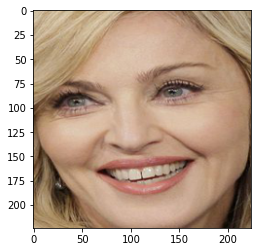

In [ ]:
#Load the photo and extract the face
pixels = extract_face(path + 'madonna.jpg')
#plot the extracted face
pyplot.imshow(pixels)
#show the plot
pyplot.show()
#Convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis = 0)
#Prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version = 2)
#Create a vggface model
model = VGGFace(model='resnet50')
#Perform prediction
yhat_for_madonna = model.predict(samples)

In [ ]:
yhat_for_madonna

array([[1.00459365e-05, 1.20531794e-07, 2.98737450e-06, ...,
        7.97245320e-07, 4.00953553e-07, 1.40038464e-05]], dtype=float32)

mindy_kaling

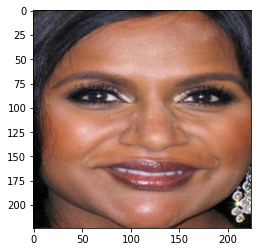

In [ ]:
#Load the photo and extract the face
pixels = extract_face(path + 'mindy_kaling.jpg')
#plot the extracted face
pyplot.imshow(pixels)
#show the plot
pyplot.show()
#Convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis = 0)
#Prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version = 2)
#Create a vggface model
model = VGGFace(model='resnet50')
#Perform prediction
yhat_for_mindy_kaling = model.predict(samples)

In [ ]:
yhat_for_mindy_kaling

array([[4.49286426e-06, 1.99912174e-05, 1.43042425e-05, ...,
        4.11340716e-06, 6.41913130e-06, 4.56873749e-06]], dtype=float32)

#Evaluating vggface2 with the test


In [ ]:
test_1 + test_2

array([[1.4538800e-05, 2.0111749e-05, 1.7291617e-05, ..., 4.9106525e-06,
        6.8200848e-06, 1.8572584e-05]], dtype=float32)

In [ ]:
test_1[0][0]

4.4928643e-06

In [ ]:
test_2

array([[1.00459365e-05, 1.20531794e-07, 2.98737450e-06, ...,
        7.97245320e-07, 4.00953553e-07, 1.40038464e-05]], dtype=float32)

In [ ]:
from math import sqrt
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [ ]:
euclidean_distance(test_1[0],test_2[0])

0.6013229531633502

In [ ]:
test_folder = '/content/drive/MyDrive/Colab Notebooks/Pattern Classification/Final Project/data/test'

In [ ]:
from os import listdir
import os
import numpy as np
from os.path import isdir
from PIL import Image

def evaluate_vggface2(test_folder):
  label = 0
  correct = 0
  count = 0
  for folder in listdir(test_folder):
    label = label + 1
    print('folder ',label)
    for file in listdir(test_folder +"/" + folder):
      count = count + 1
      print(folder)
      print(file)
      print('index: ',count)
      # extract face
      pixels = extract_face(test_folder +"/" + folder + "/" + file)
      #Convert one face into samples
      pixels = pixels.astype('float32')
      samples = expand_dims(pixels, axis = 0)
      #Prepare the face for the model, e.g. center pixels
      samples = preprocess_input(samples, version = 2)
      #Create a vggface model
      model = VGGFace(model='resnet50')
      #Perform prediction
      y_pred = model.predict(samples)

      #calculate euclidean distance
      flag = 0
      d1 = euclidean_distance(y_pred[0], yhat_for_mindy_kaling[0])
      d2 = euclidean_distance(y_pred[0], yhat_for_jerry_seinfeld[0])     
      d3 = euclidean_distance(y_pred[0], yhat_for_elton_john[0])
      d4 = euclidean_distance(y_pred[0], yhat_for_madonna[0])
      d5 = euclidean_distance(y_pred[0], yhat_for_ben_afflek[0])
      temp = min(d1, d2, d3, d4, d5)
      if temp == d1:
        flag = 1
        print('prediction: Mindy Kaling')
      elif temp == d2:
        flag = 2
        print('prediction: Jerry Seinfeld')
      elif temp == d3:
        flag = 3
        print('prediction: Elton John')
      elif temp == d4:
        flag = 4
        print('prediction: Madonna')
      elif temp == d5:
        flag = 5
        print('prediction: Ben Afflek')

      if flag == label:
        correct = correct + 1
        print('predicted correctly')
      else:
        print("predicted wrong")

  return correct / float(count) * 100.0

In [ ]:
accuracy = evaluate_vggface2(test_folder)

folder  1
mindy_kaling
httpcdnpastemagazinecomwwwarticlesmindyprojectjpg.jpg
index:  1
prediction: Mindy Kaling
predicted correctly
mindy_kaling
httpcdncdnjustjaredcomwpcontentuploadsheadlinesmindykalingcomedypilotjpg.jpg
index:  2
prediction: Jerry Seinfeld
predicted wrong
mindy_kaling
httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTIOTcwODQNTUzNjQMzcjpg.jpg
index:  3
prediction: Jerry Seinfeld
predicted wrong
mindy_kaling
httpcdnpastemagazinecomwwwarticlesmindykalingndbookjpg.jpg
index:  4
prediction: Jerry Seinfeld
predicted wrong
mindy_kaling
httpdbrbzkkbdsdcloudfrontnetwpcontentuploadsMindyKalingjpg.jpg
index:  5
prediction: Jerry Seinfeld
predicted wrong
folder  2
jerry_seinfeld
httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTIwNjANjMMDINzIxNjcjpg.jpg
index:  6
prediction: Jerry Seinfeld
predicted correctly
jerry_seinfeld
httpcdncdnjustjaredcomwpcontentuploadsheadlinesjerryseinfeldmakesbrianwilliamsjokejpg.jpg
index:  7
prediction: Jerry Seinfeld
predicted corre

In [ ]:
print('Accuracy: ', accuracy)

Accuracy:  58.333333333333336


#Face Verification With VGGFace2

#REFERENCE:


1:
https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/?fbclid=IwAR1BRK0jjQYR0Q8OakXxtRpAfPxTVZwkLfTijHuDrF7oQRptscheLE9Rcno



2: 
https://medium.com/mlearning-ai/face-recognition-for-superimposed-facemasks-using-vggface2-in-keras-c13e610acd56

3:
https://www.kaggle.com/code/lalitharajesh/face-recognition-celebrity-faces-identification/notebook

4:
https://medium.com/@saranshrajput/face-detection-using-mtcnn-f3948e5d1acb

5: 
https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

6:
https://www.kaggle.com/code/yhuan95/face-recognition-with-facenet

7:
https://www.kaggle.com/code/jake126/face-detection-using-cnn-with-the-lfw-dataset

8:
https://towardsdatascience.com/how-do-you-train-a-face-detection-model-a60330f15fd5

DATA: 
https://www.kaggle.com/datasets/dansbecker/5-celebrity-faces-dataset

https://www.kaggle.com/code/volkankalin/getting-images-with-requests/data